In [69]:
from ast import literal_eval
from collections import Counter
from datetime import datetime
import numpy as np
import pandas as pd

from sklearn.metrics import f1_score, classification_report

from sherlock.deploy.model import SherlockModel
from sherlock.features.helpers import generate_chars_col
from sklearn import *
import os
import gdown
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns
import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt
from pyarrow.parquet import ParquetFile
#from googletrans import Translator
import string
import pyarrow.lib
import ast
import re
import string
import csv
import io
import statistics as statistics
import itertools
import math as math
%matplotlib inline
# set seed for reproducibility
np.random.seed(0) 
from collections import OrderedDict
from nltk.stem.snowball import SnowballStemmer
import gensim
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from functional import pseq, seq
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from typing import Union, Tuple
import nltk
from tqdm import tqdm
from unidecode import unidecode
from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import (
    Input,
    Dense,
    Dropout,
    BatchNormalization,
    concatenate,
)
from tensorflow.keras.models import Model, model_from_json

from sherlock.deploy import helpers
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder



In [70]:
model_id = "sherlock2.0" #retreinar sherlock

In [71]:

X= pd.read_parquet('feature_vectors_final2_novo.parquet')
y=pd.read_parquet('labels_final2_novo.parquet').values.flatten()

In [72]:
X.shape

(379, 1588)

In [73]:
# Separa o nosso conjunto de dados train (20%/80%)
X_train, X_, y_train, y_= train_test_split( X, y, train_size=0.80,random_state=0)
print (f"train: {len(X_train)} ({(len(X_train) / len(X)):.2f})\n"
       f"remaining: {len(X_)} ({(len(X_) / len(X)):.2f})")

train: 303 (0.80)
remaining: 76 (0.20)


In [74]:
len(set(y_train))

190

In [75]:
X_val, X_test, y_val, y_test = train_test_split( X, y, test_size=0.5,random_state=0)

print(f"train: {len(X_train)} ({len(X_train)/len(X):.2f})\n"
      f"val: {len(X_val)} ({len(X_val)/len(X):.2f})\n"
      f"test: {len(X_test)} ({len(X_test)/len(X):.2f})")

train: 303 (0.80)
val: 189 (0.50)
test: 190 (0.50)


In [76]:
y_train = np.array([x.lower() for x in y_train])
y_val = np.array([x.lower() for x in y_val])
y_test = np.array([x.lower() for x in y_test])


In [77]:
y_train = np.array([x.strip() for x in y_train]) 
y_val = np.array([x.strip() for x in y_val]) 
y_test = np.array([x.strip() for x in y_test])

In [78]:
y_test

array(['rinovirus humano', 'consumo', 'periodo', 'no su t.m. amarela',
       'sintoma', 'periodo', 'medicos internos', 'periodo',
       'cod. mes ini. mapeam. cc. hier. loc.', 'virus da gripe dominante',
       'regiao', 'assistentes operacionais', 'doses',
       'nr dispositivos medicos', 'localizacao geografica',
       'utentes novos', 'regiao', 'des. area atuacao princ. serv.',
       'periodo', 'no intervencoes cirurgicas de ambulatorio',
       'nr telefone', 'aces hosp. grupo', 'transmissao', 'nome proprio',
       'localizacao geografica', 'periodo', 'nr cesarianas', 'periodo',
       'no s/ t.m.', 'vacinas',
       '% fraturas anca com cirurgia realizada nas primeiras 48 horas',
       'unidades totais', 'ars', 'dias de internamento', 'periodo',
       'no orgaos transplantados', 'parainfluenza virus', 'regiao',
       'anomalias congenitas dos olhos, ouvido, face e pescoco',
       'internados', 'mortalidade mensal', 'dadores regulares',
       'utentes readmitidos', '% in

In [79]:
print('Distinct types for columns in the Dataframe (should be all float32):')
print(set(X_train.dtypes))
print(set(X_val.dtypes))
print(set(X_test.dtypes))

Distinct types for columns in the Dataframe (should be all float32):
{dtype('float32')}
{dtype('float32')}
{dtype('float32')}


In [97]:
np.isin(y_val,y_train)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [86]:
model_id = "sherlock2.0"
start = datetime.now()
print(f'Started at {start}')

model = SherlockModel()
# Model will be stored with ID `model_id`
model.fit(X_train, y_train, X_val, y_val, model_id=model_id)

print('Trained and saved new model.')
print(f'Finished at {datetime.now()}, took {datetime.now() - start} seconds')

Started at 2022-05-27 18:04:46.311887
Train on 303 samples, validate on 189 samples
Epoch 1/100
303/303 [==============================] - 3s 9ms/sample - loss: 5.5190 - categorical_accuracy: 0.0462 - val_loss: 5.3233 - val_categorical_accuracy: 0.0794
Epoch 2/100
303/303 [==============================] - 1s 2ms/sample - loss: 4.8979 - categorical_accuracy: 0.2508 - val_loss: 5.1663 - val_categorical_accuracy: 0.2593
Epoch 3/100
303/303 [==============================] - 1s 2ms/sample - loss: 4.4823 - categorical_accuracy: 0.2904 - val_loss: 5.0169 - val_categorical_accuracy: 0.2593
Epoch 4/100
303/303 [==============================] - 1s 2ms/sample - loss: 4.1810 - categorical_accuracy: 0.3069 - val_loss: 4.8977 - val_categorical_accuracy: 0.3280
Epoch 5/100
303/303 [==============================] - 1s 2ms/sample - loss: 4.0104 - categorical_accuracy: 0.3201 - val_loss: 4.7914 - val_categorical_accuracy: 0.3175
Epoch 6/100
303/303 [==============================] - 1s 2ms/sample - 

Epoch 49/100
303/303 [==============================] - 1s 2ms/sample - loss: 1.6071 - categorical_accuracy: 0.6634 - val_loss: 1.1216 - val_categorical_accuracy: 0.8201
Epoch 50/100
303/303 [==============================] - 1s 2ms/sample - loss: 1.5453 - categorical_accuracy: 0.6601 - val_loss: 1.0850 - val_categorical_accuracy: 0.8466
Epoch 51/100
303/303 [==============================] - 1s 2ms/sample - loss: 1.5458 - categorical_accuracy: 0.6568 - val_loss: 1.0632 - val_categorical_accuracy: 0.8307
Epoch 52/100
303/303 [==============================] - 1s 2ms/sample - loss: 1.4670 - categorical_accuracy: 0.6799 - val_loss: 1.0437 - val_categorical_accuracy: 0.8201
Epoch 53/100
303/303 [==============================] - 1s 2ms/sample - loss: 1.5173 - categorical_accuracy: 0.6535 - val_loss: 1.0159 - val_categorical_accuracy: 0.8254
Epoch 54/100
303/303 [==============================] - 1s 2ms/sample - loss: 1.5125 - categorical_accuracy: 0.6568 - val_loss: 0.9944 - val_categoric

Epoch 97/100
303/303 [==============================] - 1s 2ms/sample - loss: 0.9194 - categorical_accuracy: 0.8020 - val_loss: 0.5502 - val_categorical_accuracy: 0.9630
Epoch 98/100
303/303 [==============================] - 1s 2ms/sample - loss: 0.8823 - categorical_accuracy: 0.8284 - val_loss: 0.5521 - val_categorical_accuracy: 0.9577
Epoch 99/100
303/303 [==============================] - 1s 2ms/sample - loss: 0.8638 - categorical_accuracy: 0.8152 - val_loss: 0.5430 - val_categorical_accuracy: 0.9577
Epoch 100/100
303/303 [==============================] - 1s 2ms/sample - loss: 0.8838 - categorical_accuracy: 0.8020 - val_loss: 0.5462 - val_categorical_accuracy: 0.9524
Trained and saved new model.
Finished at 2022-05-27 18:05:55.760819, took 0:01:09.448932 seconds


In [87]:
predicted_labels = model.predict(X_test,model_id)
predicted_labels = np.array([x.lower() for x in predicted_labels])

In [88]:
print(f'prediction count {len(predicted_labels)}, type = {type(predicted_labels)}')

size=len(y_test)

# Should be fully deterministic too.
f1_score(y_test[:size], predicted_labels[:size], average="weighted")

prediction count 190, type = <class 'numpy.ndarray'>


0.6383040935672514

In [61]:
model.store_weights(model_id=model_id) #66,3

In [31]:
# If using the original model, model_id should be replaced with "sherlock"
#model_id = "sherlock"
import warnings
warnings.filterwarnings('ignore')
classes = np.load(f"../sherlock-project/model_files/classes_{model_id}.npy", allow_pickle=True)

report = classification_report(y_test, predicted_labels, output_dict=True)

class_scores = list(filter(lambda x: isinstance(x, tuple) and isinstance(x[1], dict) and 'f1-score' in x[1] and x[0] in classes, list(report.items())))

class_scores = sorted(class_scores, key=lambda item: item[1]['f1-score'], reverse=True)

# TOP 5

In [32]:
print(f"\t\tf1-score\tprecision\trecall\t\tsupport")

for key, value in class_scores[0:5]:
    if len(key) >= 8:
        tabs = '\t' * 1
    else:
        tabs = '\t' * 2

    print(f"{key}{tabs}{value['f1-score']:.3f}\t\t\t{value['precision']:.3f}\t\t\t{value['recall']:.3f}\t\t\t{value['support']}")

		f1-score	precision	recall		support
anomalias congenitas do aparelho genital	1.000			1.000			1.000			1
ars		1.000			1.000			1.000			4
cod. acesso hosp. grupo	1.000			1.000			1.000			1
cod. nivel acesso	1.000			1.000			1.000			1
concelhos	1.000			1.000			1.000			1


# BOTTOM 5

In [33]:
print(f"\t\tf1-score\tprecision\trecall\t\tsupport")

for key, value in class_scores[len(class_scores)-5:len(class_scores)]:
    if len(key) >= 8:
        tabs = '\t' * 1
    else:
        tabs = '\t' * 2

    print(f"{key}{tabs}{value['f1-score']:.3f}\t\t\t{value['precision']:.3f}\t\t\t{value['recall']:.3f}\t\t\t{value['support']}")

		f1-score	precision	recall		support
tecnicos de diagnostico e terapeutica	0.000			0.000			0.000			1
total dadores falecidos	0.000			0.000			0.000			0
total testamentos vitais de utentes	0.000			0.000			0.000			0
vacinas reforco e gripe	0.000			0.000			0.000			0
virus da gripe a(h1)	0.000			0.000			0.000			0


In [34]:
print(classification_report(y_test, predicted_labels, digits=3))

                                                                                    precision    recall  f1-score   support

                                      % 1as consultas realizadas em tempo adequado      0.000     0.000     0.000         1
                     % fraturas anca com cirurgia realizada nas primeiras 48 horas      0.000     0.000     0.000         1
                                                 % inscritos em lic dentro do tmrg      0.000     0.000     0.000         1
                                                                  aces hosp. grupo      0.000     0.000     0.000         1
                                                                          amostras      0.000     0.000     0.000         0
                                          anomalias congenitas do aparelho genital      1.000     1.000     1.000         1
                                         anomalias congenitas do aparelho urinario      0.000     0.000     0.000         1
       

In [80]:
size = len(y_test)
mismatches = list()

for idx, k1 in enumerate(y_test[:size]):
    k2 = predicted_labels[idx]
    
    if k1==k2:
        if k2 in ('periodo'):
            print(f'[{idx}] predicted correct "{k1}" as "{k2}"')

    if k1 != k2:
        mismatches.append(k1)
        
         #zoom in to specific errors. Use the index in the next step
        if k1 in ('periodo'):
            print(f'[{idx}] expected "{k1}" but predicted "{k2}"')
        
f1 = f1_score(y_test[:size], predicted_labels[:size], average="weighted") 
print(f'Total mismatches: {len(mismatches)} (F1 score: {f1})')

data = Counter(mismatches)
data.most_common()   # Returns all unique items and their counts

[2] predicted correct "periodo" as "periodo"
[5] predicted correct "periodo" as "periodo"
[7] predicted correct "periodo" as "periodo"
[18] predicted correct "periodo" as "periodo"
[25] predicted correct "periodo" as "periodo"
[27] predicted correct "periodo" as "periodo"
[34] predicted correct "periodo" as "periodo"
[59] predicted correct "periodo" as "periodo"
[76] predicted correct "periodo" as "periodo"
[80] predicted correct "periodo" as "periodo"
[97] predicted correct "periodo" as "periodo"
[113] predicted correct "periodo" as "periodo"
[115] predicted correct "periodo" as "periodo"
[124] predicted correct "periodo" as "periodo"
[126] predicted correct "periodo" as "periodo"
[134] predicted correct "periodo" as "periodo"
[143] predicted correct "periodo" as "periodo"
[158] predicted correct "periodo" as "periodo"
[160] predicted correct "periodo" as "periodo"
[169] predicted correct "periodo" as "periodo"
[177] predicted correct "periodo" as "periodo"
[179] predicted correct "pe

[('doses', 2),
 ('rinovirus humano', 1),
 ('consumo', 1),
 ('no su t.m. amarela', 1),
 ('sintoma', 1),
 ('medicos internos', 1),
 ('cod. mes ini. mapeam. cc. hier. loc.', 1),
 ('virus da gripe dominante', 1),
 ('assistentes operacionais', 1),
 ('nr dispositivos medicos', 1),
 ('utentes novos', 1),
 ('des. area atuacao princ. serv.', 1),
 ('no intervencoes cirurgicas de ambulatorio', 1),
 ('nr telefone', 1),
 ('aces hosp. grupo', 1),
 ('transmissao', 1),
 ('nome proprio', 1),
 ('nr cesarianas', 1),
 ('no s/ t.m.', 1),
 ('vacinas', 1),
 ('% fraturas anca com cirurgia realizada nas primeiras 48 horas', 1),
 ('unidades totais', 1),
 ('dias de internamento', 1),
 ('no orgaos transplantados', 1),
 ('parainfluenza virus', 1),
 ('anomalias congenitas dos olhos, ouvido, face e pescoco', 1),
 ('internados', 1),
 ('mortalidade mensal', 1),
 ('dadores regulares', 1),
 ('utentes readmitidos', 1),
 ('% inscritos em lic dentro do tmrg', 1),
 ('no utentes', 1),
 ('nr total de dadores de orgaos', 1),
 

In [81]:
labels=['% 1as consultas realizadas em tempo adequado','% fraturas anca com cirurgia realizada nas primeiras 48 horas',
        '% gdh p/ proc. ambulatorizaveis','% inscritos em lic dentro do tmrg','aces hosp. grupo','amostras',
        'anomalias congenitas do aparelho digestivo','anomalias congenitas do aparelho genital',
        'anomalias congenitas do aparelho urinario','anomalias congenitas do sistema nervoso central',
        'anomalias congenitas dos olhos, ouvido, face e pescoco','anomalias e deformacoes do sistema musculo-esqueletico',
        'ars','assistentes operacionais','cod. acesso hosp. grupo','cod. centro custo','cod. mes ini. mapeam. cc. hier. loc.',
        'cod. nivel acesso','concelhos','consultas dos test. vit. portal do profissional','consumo','dadores regulares',
        'ddd consumidas de carbapenemes','ddd consumidas dos restantes ant.','des. area atuacao princ. serv.',
        'des. centro custo','des. instituicao','desvio padrao da idade dos utentes novos','dias de internamento',
        'doenca de declaracao obrigatoria','doentes saidos','doses' ,'doses desconhecidas','doses1','doses1 %',
        'doses2','doses2 %','enfermeiros','entidade','fenda labial e fenda palatina','grupo etario' ,'grupo hospitalar',
        'grupo sanguineo','idade media dos utentes novos','indice icaro','infecao 2+ agentes respiratorios','informaticos',
        'instituicao','internados','jovens com pnv totalmente cumprido na data do 14o aniversario','lab','local de trabalho',
        'localizacao geografica','lotacao praticada','media de participantes por minutos de sessao pds','medicos internos',
        'mortalidade avc isquemico 30 dias','mortalidade mensal','n_confirmados','no casos sindroma gripal testados',
        'no consultas medicas total','no de doentes em le','no ep. cir. amb e int c/ proc. ambulatorizaveis',
        'no ep. cir. amb. c/ proc. ambulatorizaveis','no ep. utentes c/ cir. real. nas 1as 48h apos admissao',
        'no intervencoes cirurgicas de ambulatorio','no intervencoes cirurgicas programadas',
        'no intervencoes cirurgicas urgentes','no orgaos transplantados','no primeiras ce realizadas com registo no cth',
        'no s/ t.m.','no su t.m. amarela','no su t.m. azul','no su t.m. verde','no su t.m. vermelha', 'no utentes',
        'nome proprio','nomenclatura portuguesa do dispositivo medico (npdm)','nr casos','nr casos gripe testados',
        'nr cesarianas','nr dadores por milhao de habitantes (pmh)','nr dispositivos medicos',
        'nr indiciados nao toxicodependentes','nr indiciados toxicodependentes','nr processos de contraordenacao',
        'nr reg. nascer utente','nr telefone','nr total de dadores de orgaos','nr virus respiratorios detetados',
        'obitos','ordem','orgao','outras anomalias congenitas','outros','pais','parainfluenza virus','periodo',
        'peso','pessoas gripe','pessoas inoculadas %','pessoas reforco','pessoas vacinadas completamente',
        'pessoas vacinadas completamente %','pessoas vacinadas parcialmente',
        'proporcao criancas 2 anos, c/ pnv cumprido ate 2 anos','proporcao idosos ou doenca cronica, c/ vacina da gripe',
        'recem-nascidos c/ 1+ domicilio enf. < 15 dias de vida','recem-nascidos c/ cons. med. vigil. ate 28 dias vida',
        'recuperados','regiao','rinovirus humano','rt','semana','sexo','sexo feminino','sintoma','suspeitos',
        'taxa anual de ocupacao em internamento','taxa de cobertura da vacina antigripal sazonal (%)',
        'taxa de incidencia de gripe semanal (100.000 hab)','tecnicos de diagnostico e terapeutica',
        'test. vit. de utentes c/ nacionalidade portuguesa','tipo instituicao','tipo uf serv. separt.','tipologia',
        'total consultas telemedicina','total dadores falecidos','total dadores vivos','total de minutos de conferencia',
        'total de participantes','transmissao','uf serv. depart. hier. loc.','uls grupo','unidades antibioticos',
        'unidades totais','utentes em tratamento',
        'utentes inscritos com a vacina da gripe prescrita ou efetuada nos ultimos 12 meses','utentes novos',
        'utentes readmitidos','vacinacao iniciada 05-11','vacinas','vacinas reforco e gripe','vigilancia',
        'virus da gripe','virus da gripe a(h1)','virus da gripe a(h1)pdm09','virus da gripe b',
        'virus da gripe b (linhagem yamagata)','virus da gripe dominante']

In [83]:
from sklearn.metrics import multilabel_confusion_matrix
cf_matrix=multilabel_confusion_matrix(y_test, predicted_labels)

cf_matrix


array([[[189,   0],
        [  1,   0]],

       [[189,   0],
        [  1,   0]],

       [[187,   3],
        [  0,   0]],

       [[189,   0],
        [  1,   0]],

       [[189,   0],
        [  1,   0]],

       [[189,   1],
        [  0,   0]],

       [[189,   1],
        [  0,   0]],

       [[189,   0],
        [  1,   0]],

       [[189,   0],
        [  1,   0]],

       [[189,   1],
        [  0,   0]],

       [[189,   0],
        [  1,   0]],

       [[189,   1],
        [  0,   0]],

       [[186,   0],
        [  0,   4]],

       [[189,   0],
        [  1,   0]],

       [[189,   0],
        [  0,   1]],

       [[187,   2],
        [  0,   1]],

       [[189,   0],
        [  1,   0]],

       [[189,   0],
        [  0,   1]],

       [[189,   0],
        [  0,   1]],

       [[188,   1],
        [  0,   1]],

       [[189,   0],
        [  1,   0]],

       [[189,   0],
        [  1,   0]],

       [[185,   4],
        [  0,   1]],

       [[189,   0],
        [  0, 

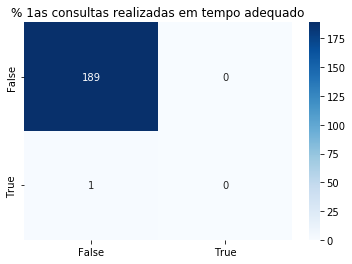

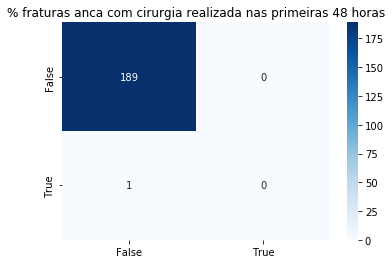

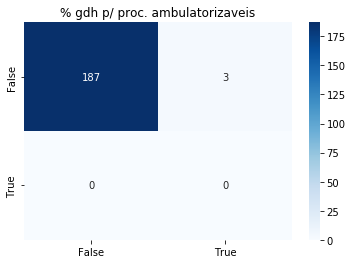

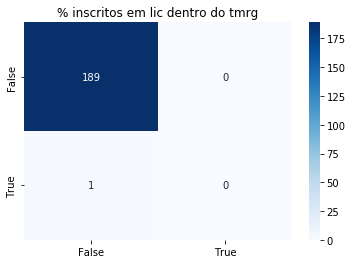

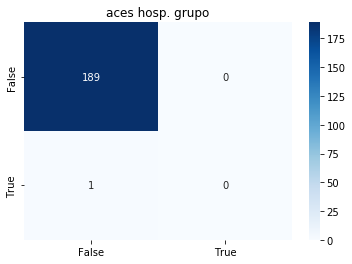

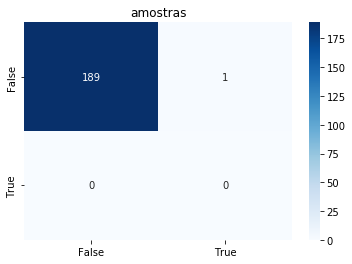

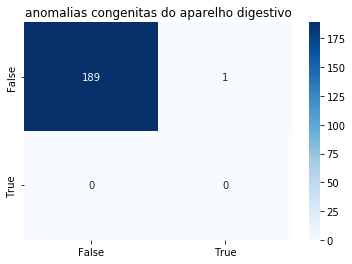

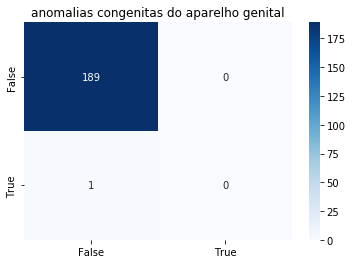

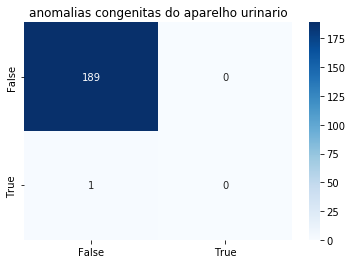

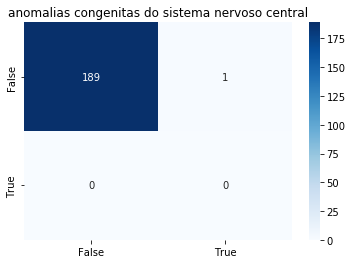

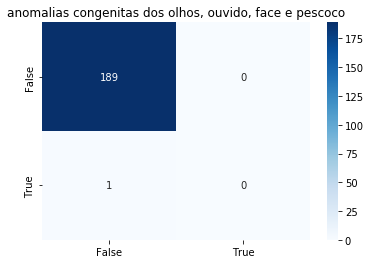

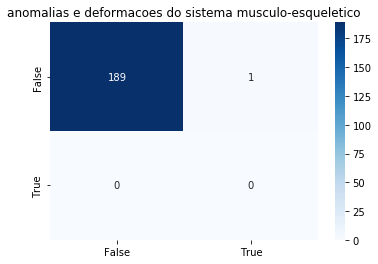

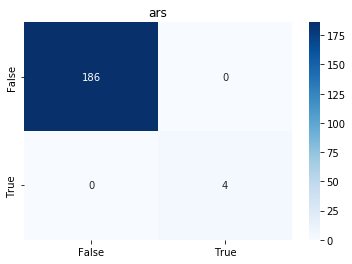

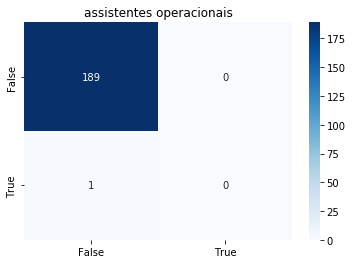

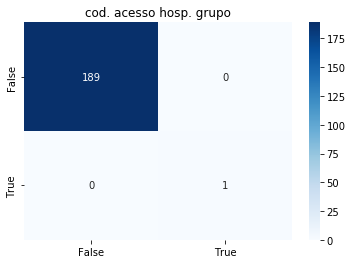

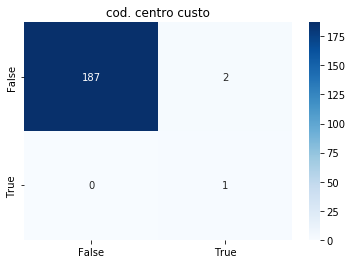

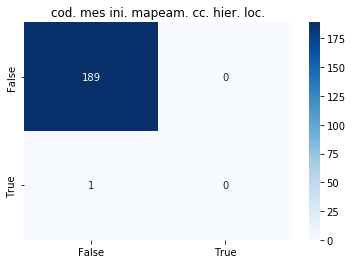

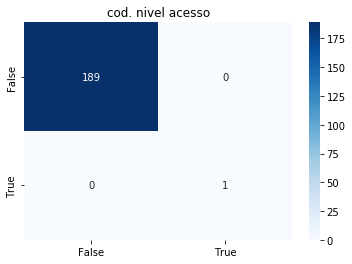

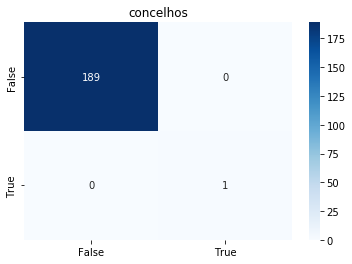

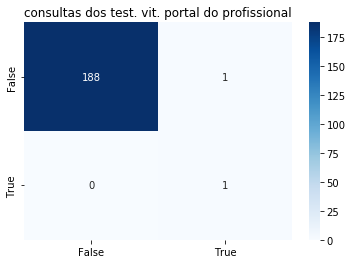

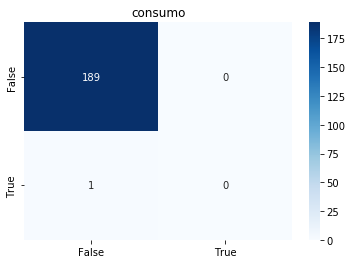

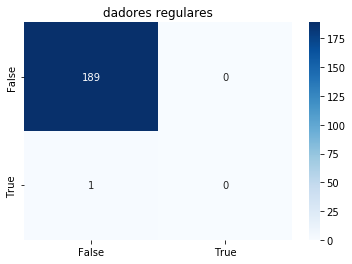

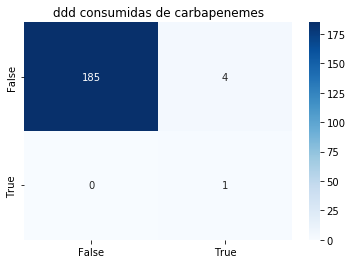

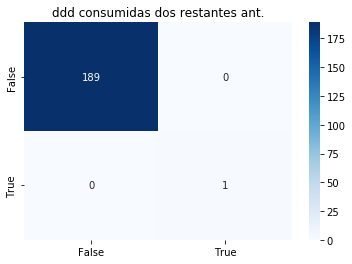

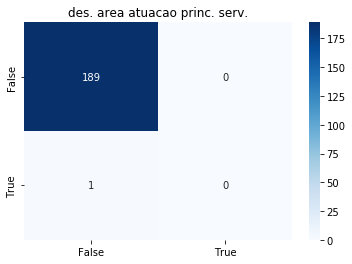

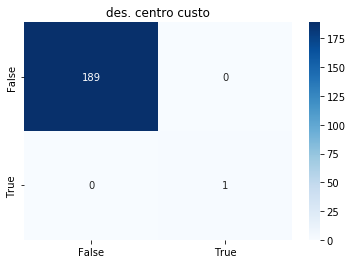

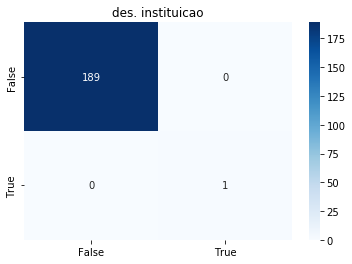

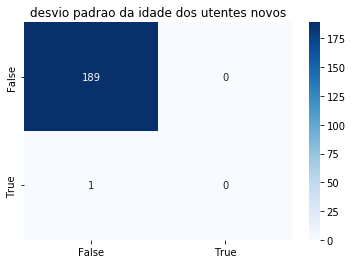

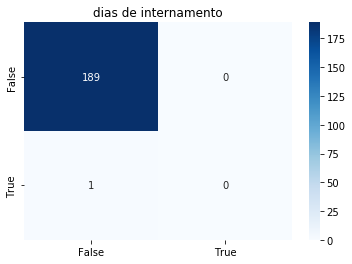

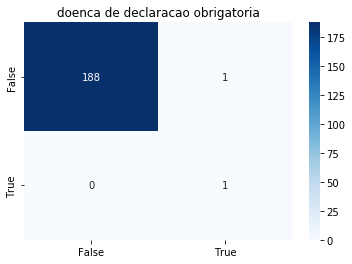

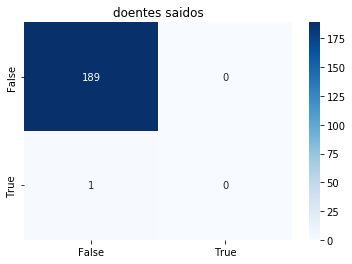

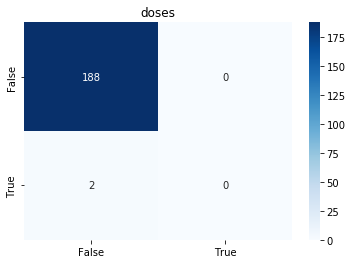

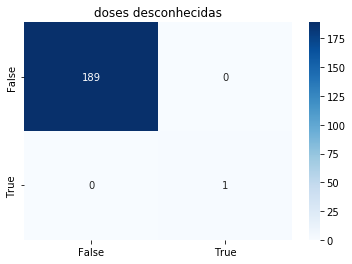

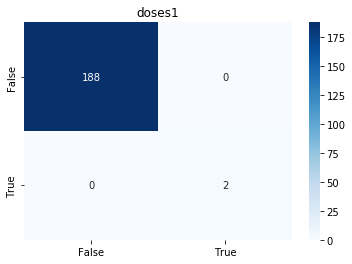

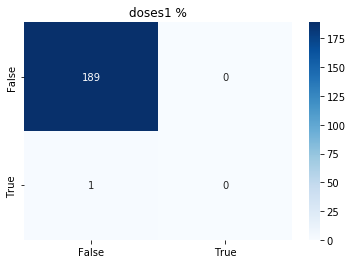

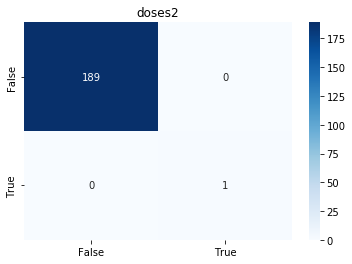

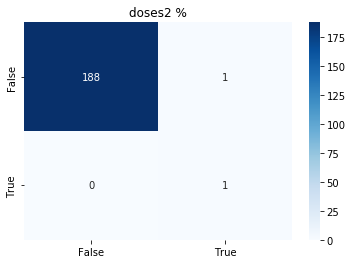

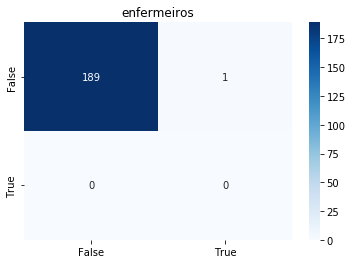

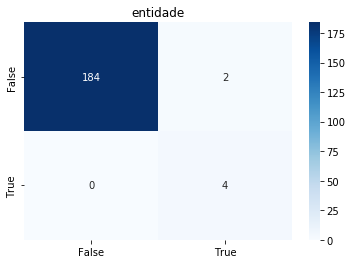

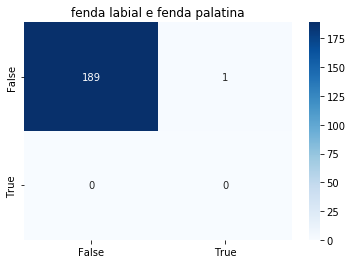

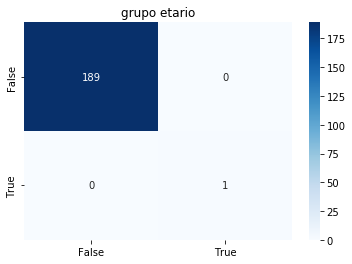

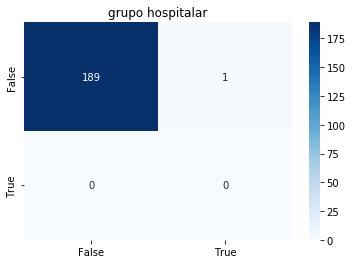

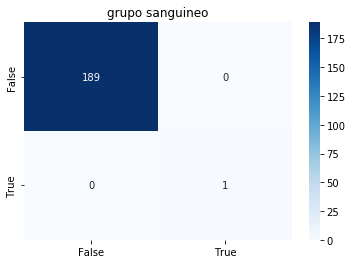

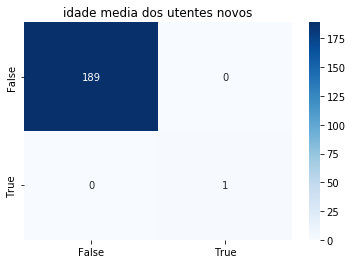

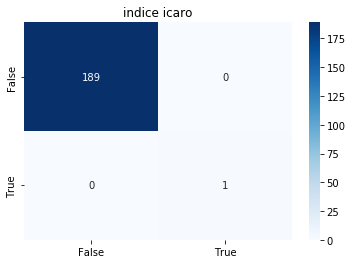

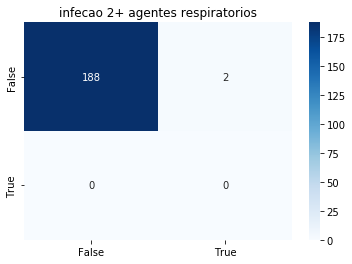

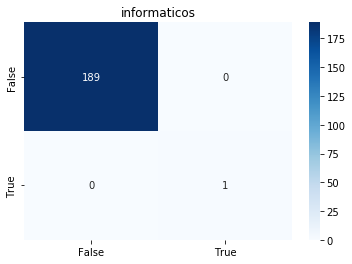

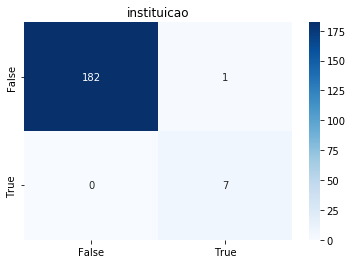

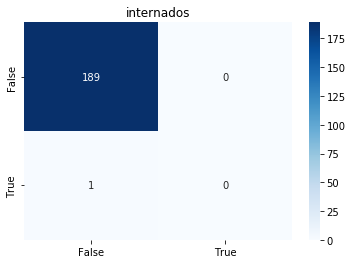

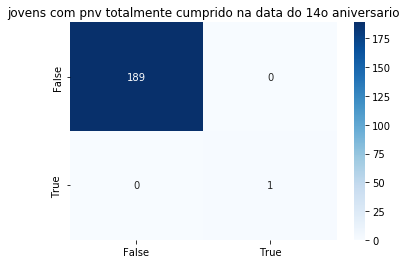

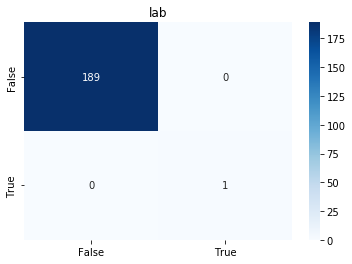

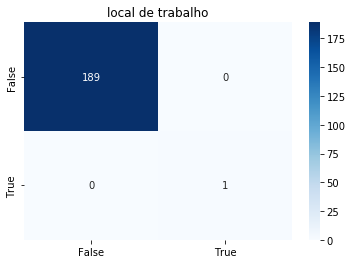

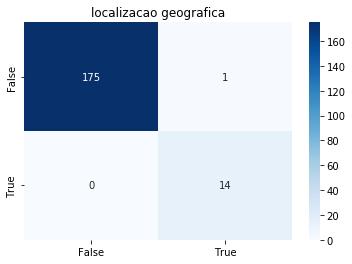

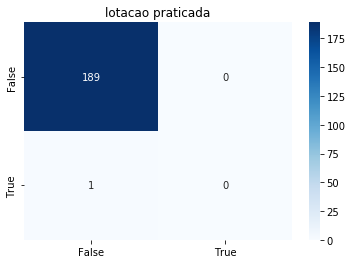

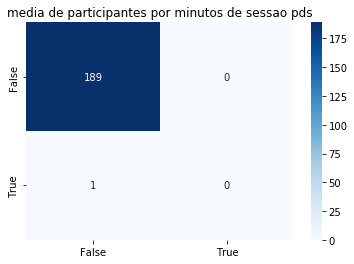

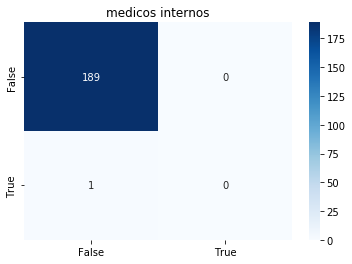

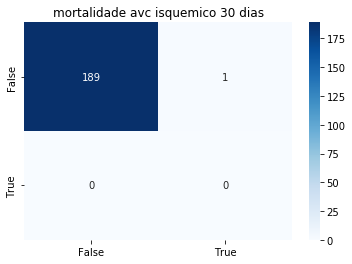

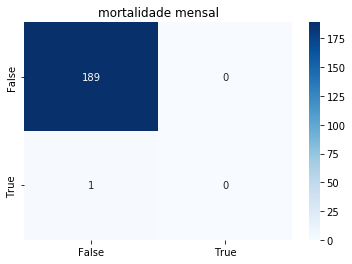

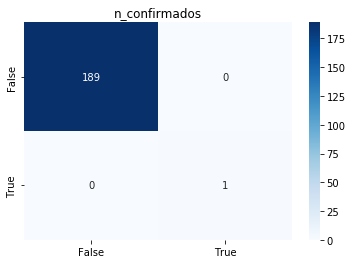

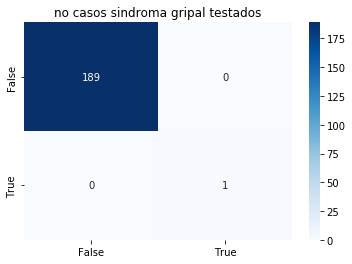

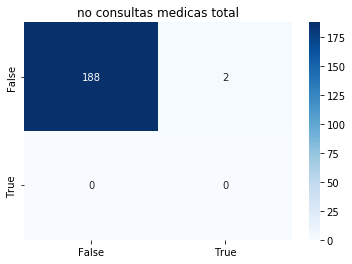

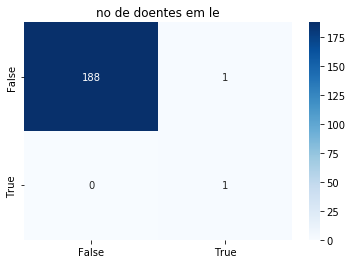

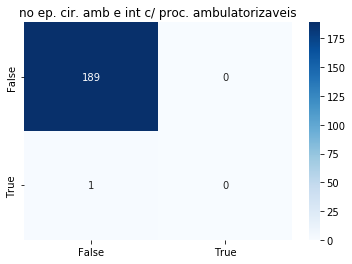

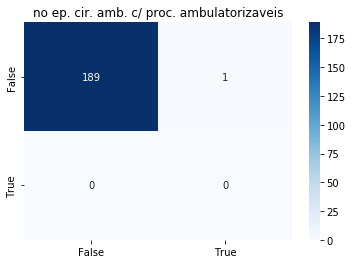

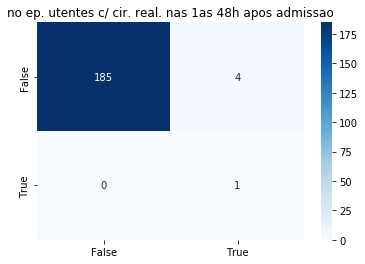

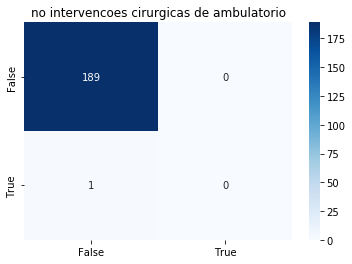

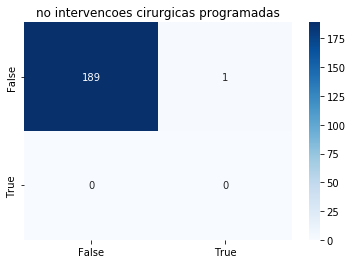

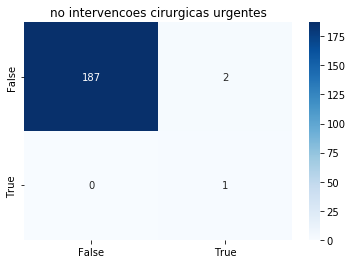

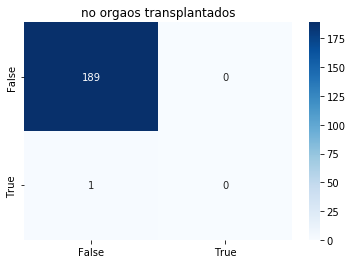

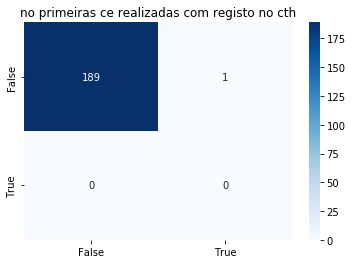

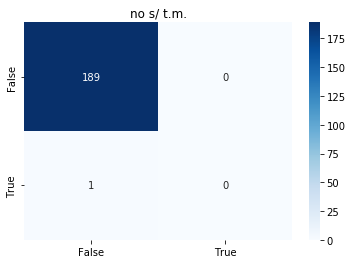

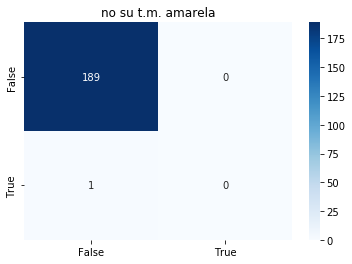

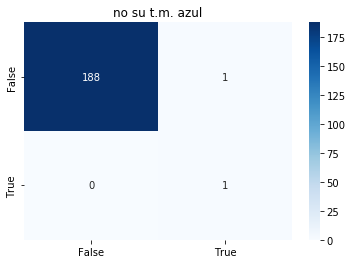

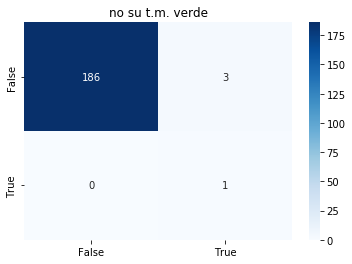

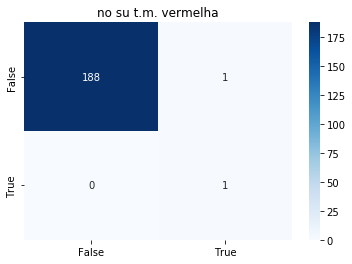

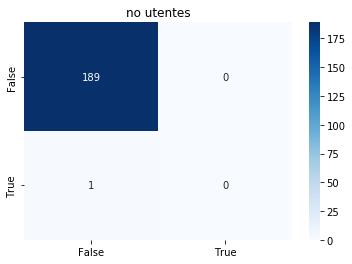

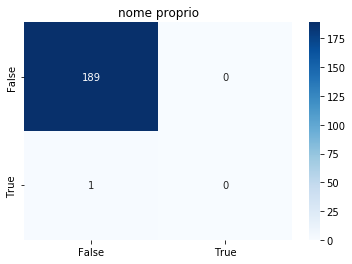

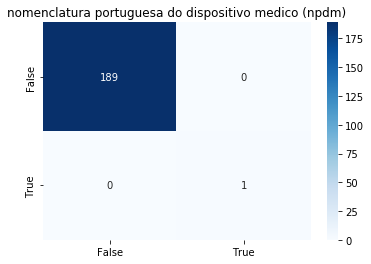

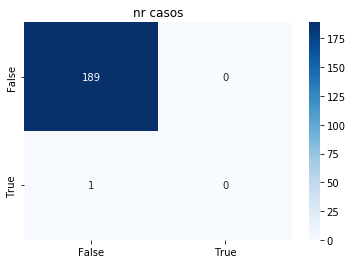

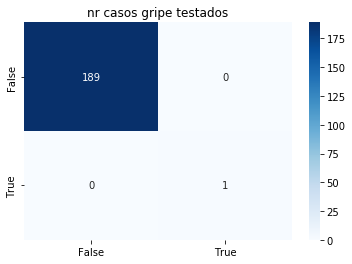

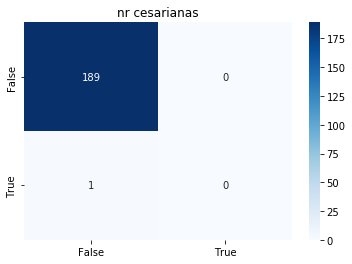

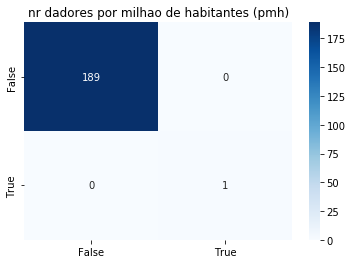

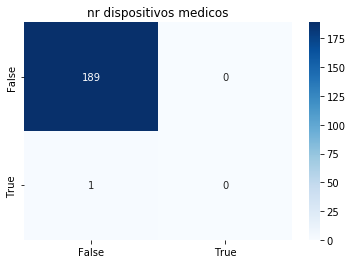

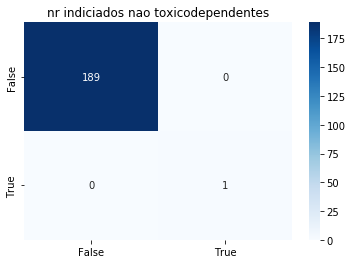

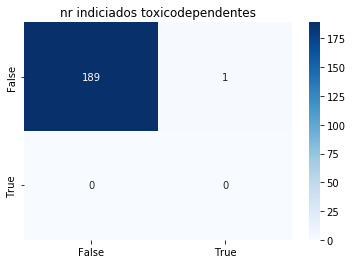

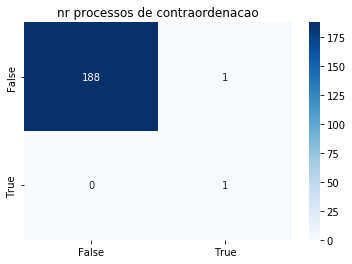

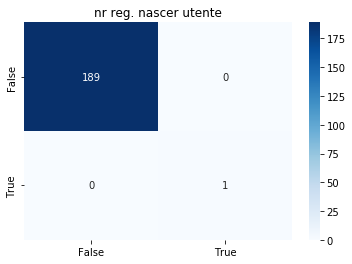

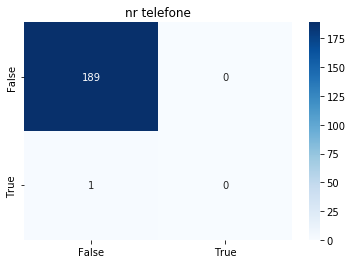

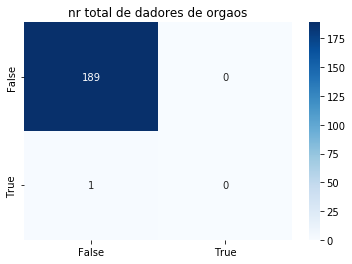

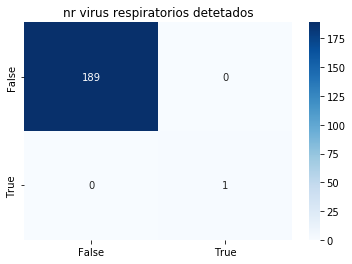

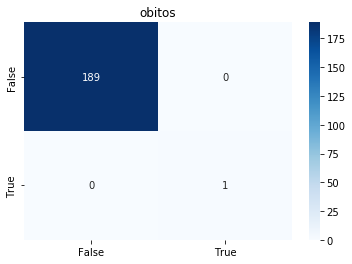

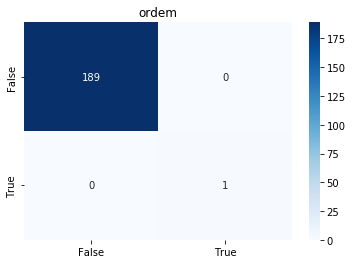

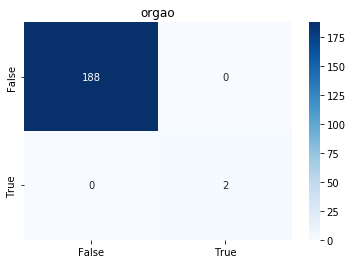

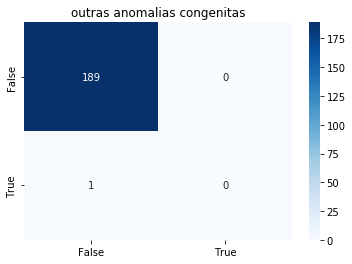

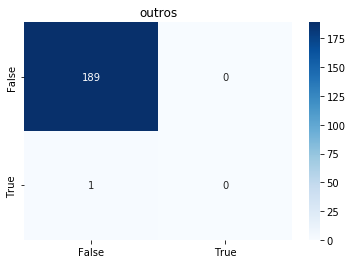

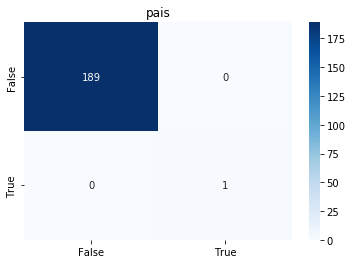

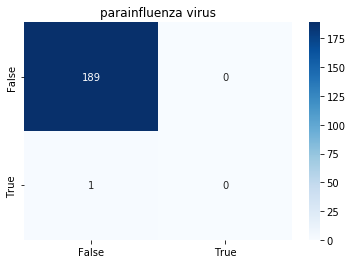

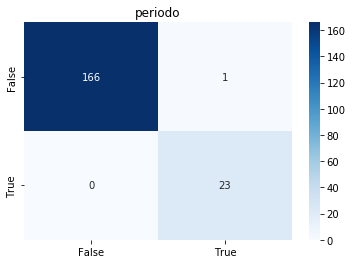

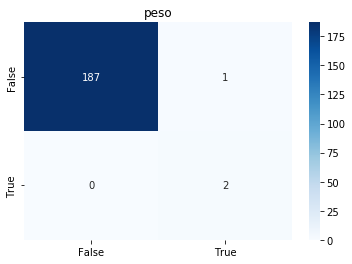

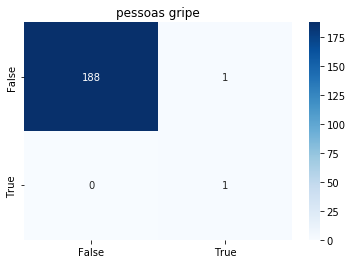

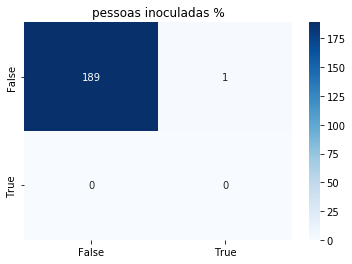

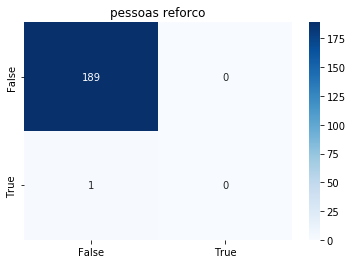

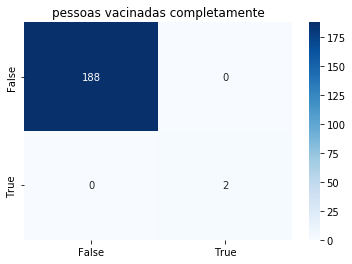

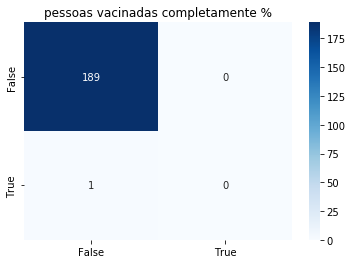

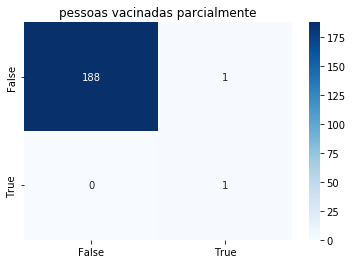

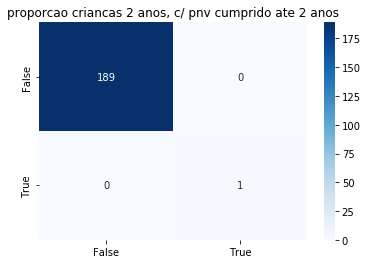

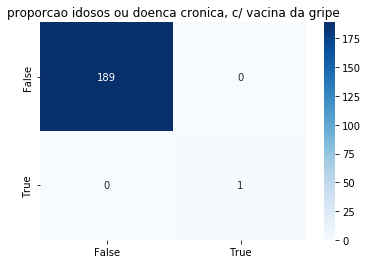

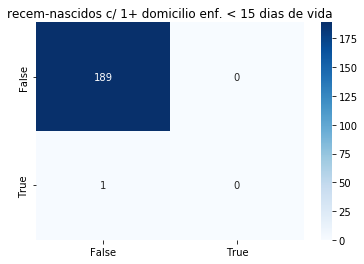

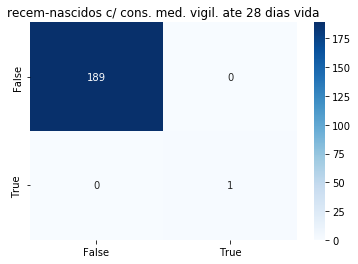

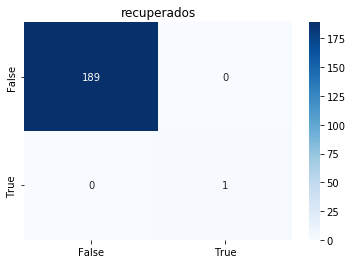

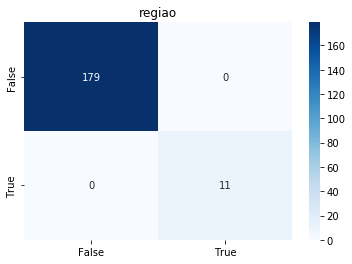

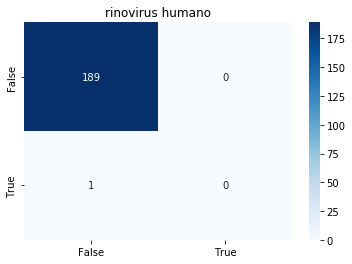

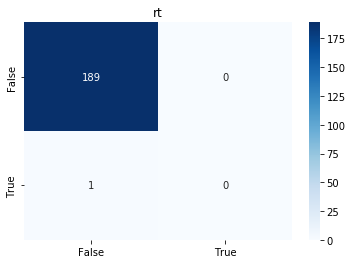

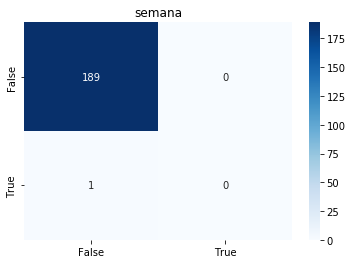

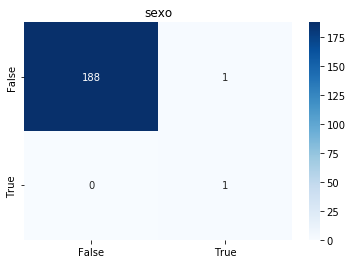

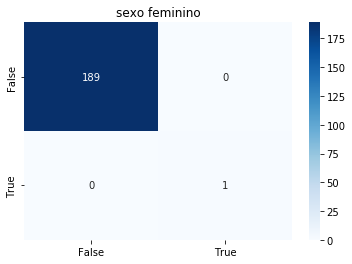

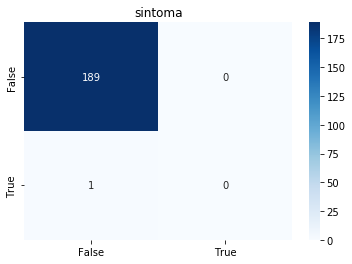

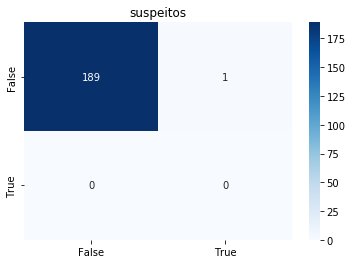

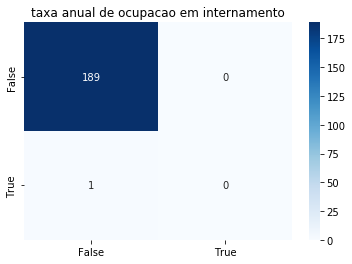

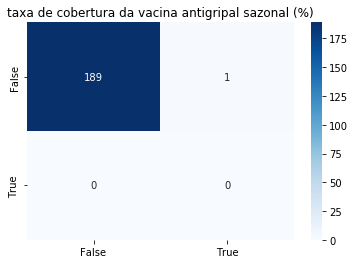

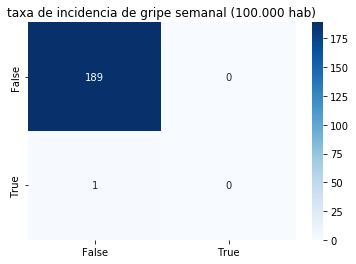

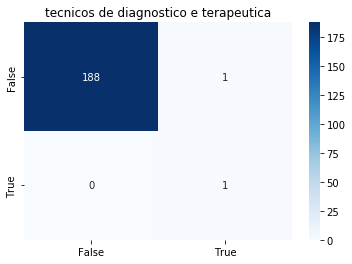

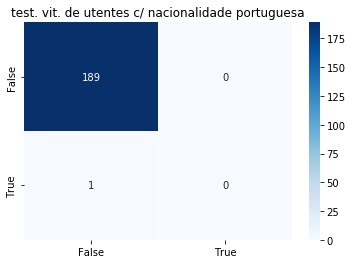

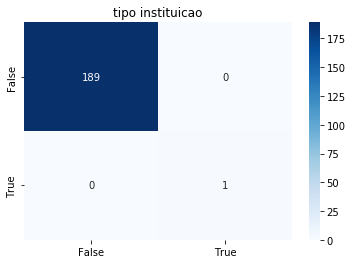

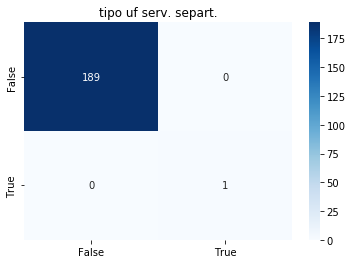

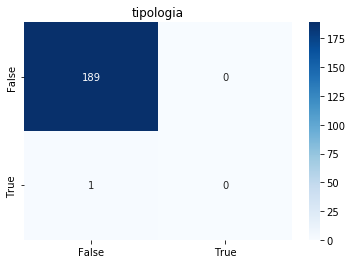

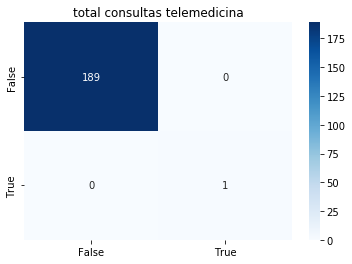

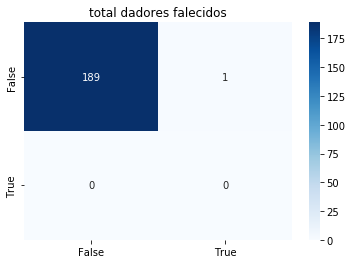

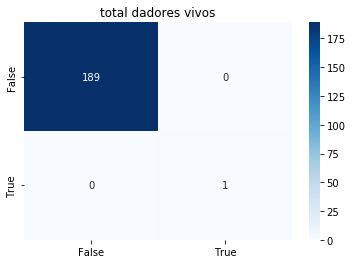

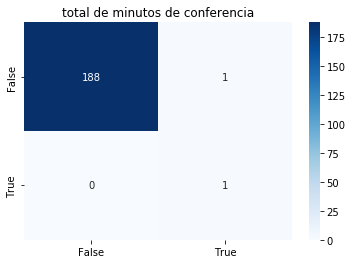

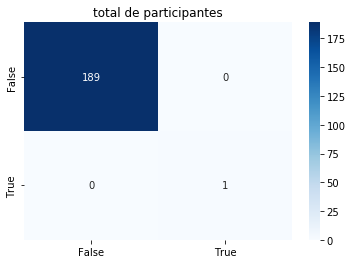

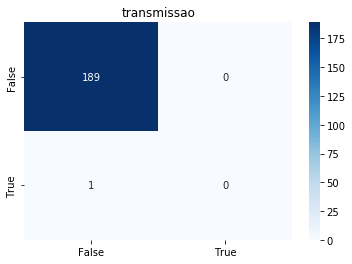

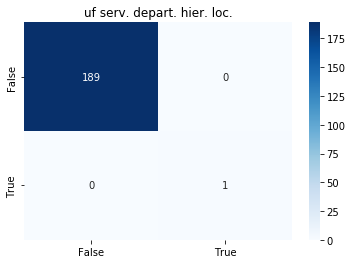

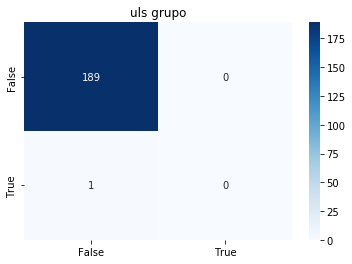

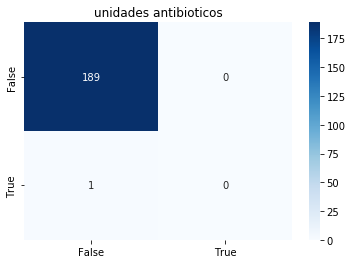

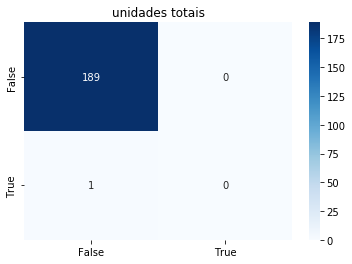

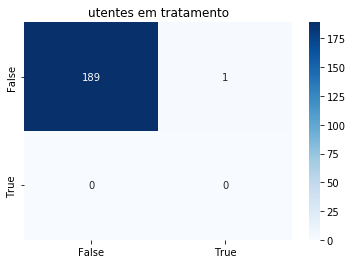

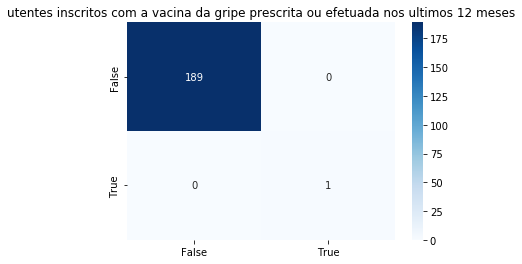

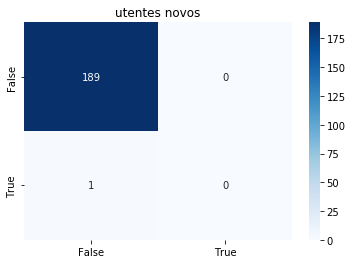

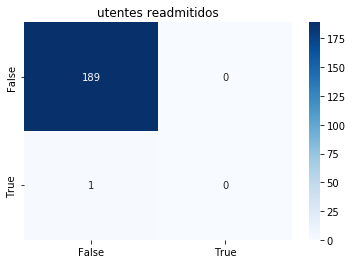

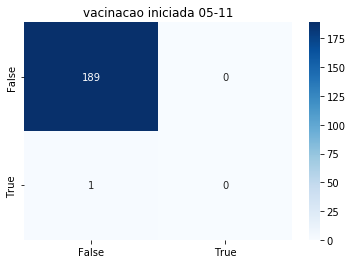

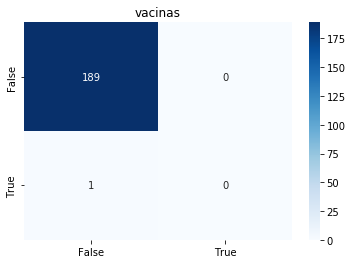

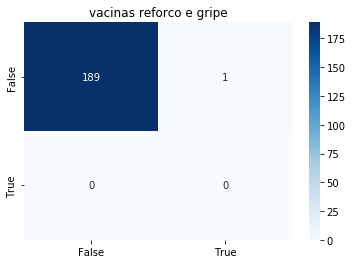

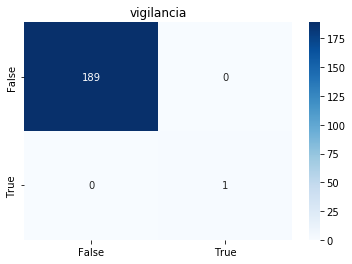

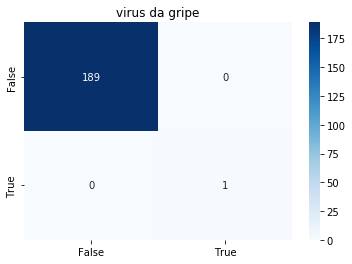

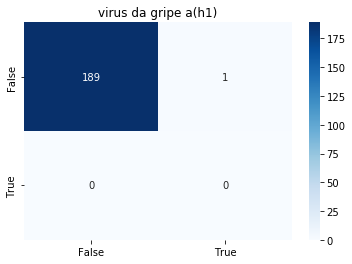

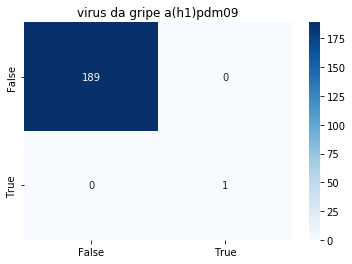

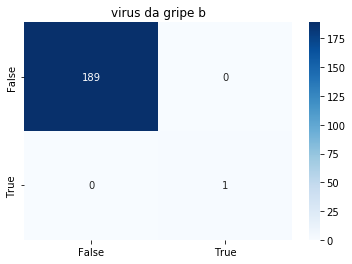

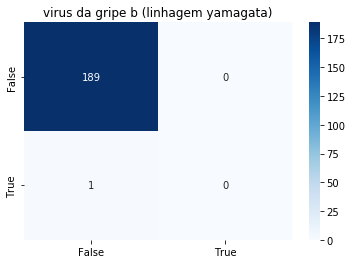

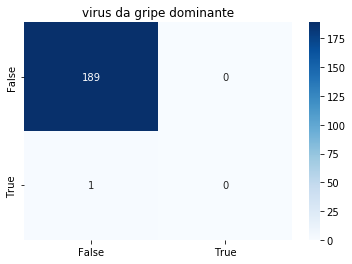

[[28251    59]
 [   59   131]]


In [84]:
array = [[0,0],[0,0]]
for i,l in zip(cf_matrix,labels):
    c = i
    # soma as matrizes de confusões
    array = array + c
    plt.title(l)
    ax= plt.subplot()
    sns.heatmap(i, annot=True, cmap='Blues',fmt='d',ax=ax)
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    
    plt.show()
print(array)


# testar com dados sinteticos


In [64]:
start = datetime.now()
print(f'Started at {start}')

model = SherlockModel();
model.initialize_model_from_json(with_weights=True, model_id="sherlock");

print('Initialized model.')
print(f'Finished at {datetime.now()}, took {datetime.now() - start} seconds')

Started at 2022-05-27 17:49:48.342046
Initialized model.
Finished at 2022-05-27 17:49:51.190548, took 0:00:02.848502 seconds


In [65]:
dad_s= pd.read_parquet("../treino/dad_s.parquet")
dad_s

,n_[0]-agg-any,n_[0]-agg-all,n_[0]-agg-mean,n_[0]-agg-var,n_[0]-agg-min,n_[0]-agg-max,n_[0]-agg-median,n_[0]-agg-sum,n_[0]-agg-kurtosis,n_[0]-agg-skewness,...,par_vec_390,par_vec_391,par_vec_392,par_vec_393,par_vec_394,par_vec_395,par_vec_396,par_vec_397,par_vec_398,par_vec_399
0,1.0,0.0,0.042,0.040236,0.0,1.0,0.0,42.0,18.853365,4.566548,...,-0.001093,-0.00019,-0.000603,0.000873,-0.001167,0.001147,-0.000362,-0.000358,-0.001209,-0.000787
1,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,-3.000000,0.000000,...,-0.001093,-0.00019,-0.000603,0.000873,-0.001167,0.001147,-0.000362,-0.000358,-0.001209,-0.000787
2,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,-3.000000,0.000000,...,-0.001093,-0.00019,-0.000603,0.000873,-0.001167,0.001147,-0.000362,-0.000358,-0.001209,-0.000787
3,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,-3.000000,0.000000,...,-0.001093,-0.00019,-0.000603,0.000873,-0.001167,0.001147,-0.000362,-0.000358,-0.001209,-0.000787
4,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,-3.000000,0.000000,...,-0.001093,-0.00019,-0.000603,0.000873,-0.001167,0.001147,-0.000362,-0.000358,-0.001209,-0.000787
5,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,-3.000000,0.000000,...,-0.001093,-0.00019,-0.000603,0.000873,-0.001167,0.001147,-0.000362,-0.000358,-0.001209,-0.000787
6,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,-3.000000,0.000000,...,-0.001093,-0.00019,-0.000603,0.000873,-0.001167,0.001147,-0.000362,-0.000358,-0.001209,-0.000787
7,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,-3.000000,0.000000,...,-0.001093,-0.00019,-0.000603,0.000873,-0.001167,0.001147,-0.000362,-0.000358,-0.001209,-0.000787
8,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,-3.000000,0.000000,...,-0.001093,-0.00019,-0.000603,0.000873,-0.001167,0.001147,-0.000362,-0.000358,-0.001209,-0.000787
9,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,-3.000000,0.000000,...,-0.001093,-0.00019,-0.000603,0.000873,-0.001167,0.001147,-0.000362,-0.000358,-0.001209,-0.000787


In [ ]:
def _proba_to_classes2(y_pred, model_id: str = "sherlock") -> np.array:
    """Get predicted semantic types from prediction vectors.

    Parameters
    ----------
    y_pred
        Nested vector with for each sample a vector of likelihoods per semantic type.
    model_id
        Identifier of model to use.

    Returns
    -------
    y_pred
        Array of Predicted semantic labels.
    """
    arr=[]
    for i in range(0, len(y_pred)):
        y_pred_int = y_pred[i]
        encoder = LabelEncoder()
        encoder.classes_ = np.load(
            f"../sherlock-project/model_files/classes_{model_id}.npy", allow_pickle=True
        )

        y_pred = encoder.inverse_transform(y_pred_int)
        arr.append(y_pred)
    return arr

In [67]:
#funçao que dado um dataframe de features extraction da o top 3 de cada row
def top_3_pred(df: pd.DataFrame):
    n=3
    for i in range(0, df.shape[0]):
        print(f"Row nº {i}")
        a=df.iloc[i:i+1,:]
      
    #n=3
        probs = model.predict_proba(a)
        best_n = np.argsort(probs, axis=1)[:,-n:]
#best_n
#for i in range(0, len(best_n)):  
 #   b= best_n[i]
    #print(best_n[i])
        best_n5=_proba_to_classes2(best_n, model_id)
        for i in range(0, len(best_n5)):  
            b= best_n5[i]
    #for index, value in enumerate(b):
     #   print(f"S1_vec('{index}')<= {value}")
#print(best_n5)
#probs
#best_n5
        ss=[]
        for i, e in reversed(list(enumerate(b))):
               ss.append(e)
#ss 
    
        print("Top 3 de Previsões:")
        for j,i in zip(range(1,4),range(0,3)):
            print(f" {j} -> {ss[i]}") #ss[i]
        print("\n")

In [68]:
# vai ver o top 3 de previsoes do nossos dados sinteticos
top_3_pred(dad_s)

Row nº 0
Top 3 de Previsões:
 1 -> peso
 2 -> cod. centro custo
 3 -> proporcao criancas 7 anos, c/ pnv cumprido ate 7 anos


Row nº 1
Top 3 de Previsões:
 1 -> doenca de declaracao obrigatoria
 2 -> instituicao de saude
 3 -> nomenclatura portuguesa do dispositivo medico (npdm)


Row nº 2
Top 3 de Previsões:
 1 -> local de trabalho
 2 -> instituicao de saude
 3 -> grupo etario


Row nº 3
Top 3 de Previsões:
 1 -> naturalidade
 2 -> nomenclatura portuguesa do dispositivo medico (npdm)
 3 -> aces


Row nº 4
Top 3 de Previsões:
 1 -> local de trabalho
 2 -> instituicao de saude
 3 -> doenca de declaracao obrigatoria


Row nº 5
Top 3 de Previsões:
 1 -> sexo
 2 -> orgao
 3 -> cod. nivel acesso


Row nº 6
Top 3 de Previsões:
 1 -> naturalidade
 2 -> concelhos
 3 -> doses2 %


Row nº 7
Top 3 de Previsões:
 1 -> pais
 2 -> cod. area atuacao princ. serv.
 3 -> tipo uf serv. separt.


Row nº 8
Top 3 de Previsões:
 1 -> naturalidade
 2 -> concelhos
 3 -> doses2 %


Row nº 9
Top 3 de Previsões:


In [18]:
dad_sl= pd.read_parquet("../treino/dados_sinteticos_labels.parquet")
dad_sl

,labels
0,nr telefone
1,nome
2,nome proprio
3,meio
4,apelido
5,genero
6,morada
7,pais
8,naturalidade
9,pais nat


In [94]:
predicted_labels = model.predict(dad_s, "sherlock2.0")

In [95]:
predicted_labels = np.array([x.lower() for x in predicted_labels])

In [96]:
predicted_labels

array(['anomalias e deformacoes do sistema musculo-esqueletico',
       'doenca de declaracao obrigatoria', 'ars', 'estado civil',
       'local de trabalho', 'sexo', 'naturalidade', 'pais',
       'naturalidade', 'pais', 'estado civil', 'local de trabalho',
       'grupo etario', 'periodo'], dtype='<U54')